**1. Read and import data**

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
dataset = pd.read_csv('./data/salary.csv', sep='|')

In [33]:
dataset.head(2)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN


**2. Cleaning the data**

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
id                      34746 non-null int64
job_title               34746 non-null object
location                34746 non-null object
salary_currency         34742 non-null object
career_level            34746 non-null object
experience_level        30205 non-null object
education_level         34746 non-null object
employment_type         33402 non-null object
job_function            34746 non-null object
job_benefits            27330 non-null object
company_process_time    24555 non-null object
company_size            29103 non-null object
company_industry        33132 non-null object
job_description         34745 non-null object
salary                  9352 non-null float64
dtypes: float64(1), int64(1), object(13)
memory usage: 4.0+ MB


In [35]:
# Check null values
dataset.isnull().sum()

id                          0
job_title                   0
location                    0
salary_currency             4
career_level                0
experience_level         4541
education_level             0
employment_type          1344
job_function                0
job_benefits             7416
company_process_time    10191
company_size             5643
company_industry         1614
job_description             1
salary                  25394
dtype: int64

In [36]:
# Nampilin tipe kolom "Object" & "Number"
objectType  = dataset.select_dtypes(['object']).columns
numericType  = dataset.select_dtypes(['number']).columns
print(objectType)
print(numericType)

dataset[numericType].describe()

Index(['job_title', 'location', 'salary_currency', 'career_level',
       'experience_level', 'education_level', 'employment_type',
       'job_function', 'job_benefits', 'company_process_time', 'company_size',
       'company_industry', 'job_description'],
      dtype='object')
Index(['id', 'salary'], dtype='object')


,id,salary
count,34746.000000,9.352000e+03
mean,17373.500000,7.358879e+06
std,10030.450563,2.148128e+07
min,1.000000,1.000000e+01
25%,8687.250000,4.250000e+06
50%,17373.500000,5.500000e+06
75%,26059.750000,8.000000e+06
max,34746.000000,2.000000e+09


In [37]:
# Remove Column 
dataset = dataset.drop(labels=["id", "salary_currency", "job_benefits", "job_function", "job_description",
"company_process_time", "company_size", "company_industry", "employment_type"], axis=1)

Cleaning Salary

In [38]:
# job_title Lowercase
dataset['job_title'] = dataset['job_title'].str.lower()

In [39]:
# Mengisi data salary yang nan atau null dengan median sesuai dengan job_title atau pekerjaannya
dataset['salary'].fillna(dataset.groupby(['experience_level'])['salary'].transform('median'), inplace=True)

# Drop salary nan atau null
dataset.dropna(subset=['salary'], inplace=True)

dataset['salary'] = dataset['salary'].round(0)

Cleaning Experience Level

In [40]:
# Convert experience_level str => float
dataset["experience_level"] = dataset["experience_level"].str.replace("\D", "").fillna(0).astype('float')

In [41]:
# Mengisi data experience_level yang 0 dengan median by job_title
dataset['experience_level'].replace(to_replace=0, value=dataset.groupby('job_title')['experience_level'].transform('median'), inplace=True)

dataset= dataset[dataset['experience_level'] != 0]

Outlier

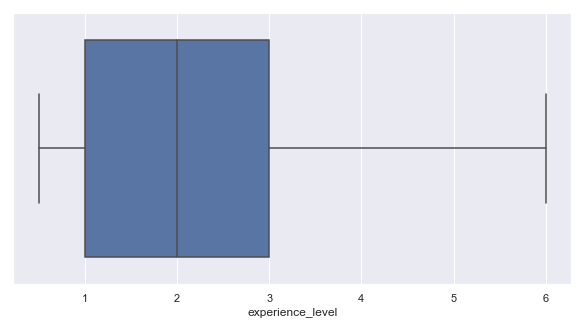

In [42]:
# IQR

# Experience
per25Exp = dataset['experience_level'].quantile(0.25)
per75Exp = dataset['experience_level'].quantile(0.75)
iqrExp = per75Exp - per25Exp

lower_limit = per25Exp - 1.5 * iqrExp
upper_limit = per75Exp + 1.5 * iqrExp

dataset = dataset[~((dataset["experience_level"] < (lower_limit)) | (dataset["experience_level"] > (upper_limit)))]

sns.boxplot(dataset["experience_level"])
plt.show()


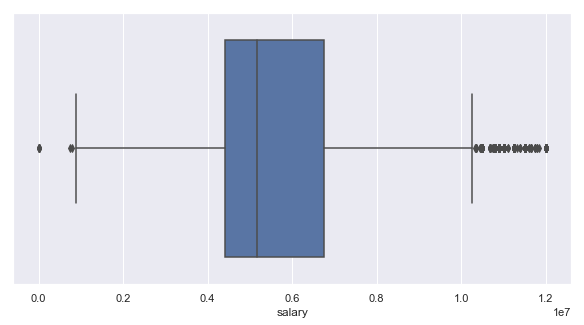

In [43]:
# Salary
per25Salary = dataset['salary'].quantile(0.25)
per75Salary = dataset['salary'].quantile(0.75)
iqrSalary = per75Salary - per25Salary

lower_limit = per25Salary - 1.5 * iqrSalary
upper_limit = per75Salary + 1.5 * iqrSalary

dataset = dataset[~((dataset["salary"] < (lower_limit)) | (dataset["salary"] > (upper_limit)))]

sns.boxplot(dataset["salary"])
plt.show()

In [44]:
stats.chi2_contingency(dataset["salary"])

(0.0,
 1.0,
 0,
 array([ 4825000.,  7500000., 10500000., ...,  6250000.,  3387500.,
         5200000.]))

In [45]:
stats.chi2_contingency(dataset["experience_level"])

(0.0, 1.0, 0, array([4., 2., 3., ..., 2., 1., 1.]))

Result Cleaning

In [46]:
dataset.shape

(14664, 6)

In [47]:
# Check null values
dataset.isnull().sum()

job_title           0
location            0
career_level        0
experience_level    0
education_level     0
salary              0
dtype: int64

In [48]:
dataset.reset_index(drop=True, inplace=True)
dataset.head(5)

,job_title,location,career_level,experience_level,education_level,salary
0,sales admin,Jakarta Barat,Supervisor/Koordinator,4.0,Sarjana (S1),4825000.0
1,japanese interpreter,Bekasi,Pegawai (non-manajemen & non-supervisor),2.0,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",7500000.0
2,kepala pabrik,Balikpapan,Supervisor/Koordinator,3.0,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",10500000.0
3,admin online shop,Tangerang,Pegawai (non-manajemen & non-supervisor),1.0,"SMA, SMU/SMK/STM",2150000.0
4,accounting staff,Tangerang,Pegawai (non-manajemen & non-supervisor),2.0,Sarjana (S1),5005000.0


In [49]:
dataset.describe()

,experience_level,salary
count,14664.000000,1.466400e+04
mean,1.991578,5.742702e+06
std,1.175496,2.202146e+06
min,0.500000,1.000000e+01
25%,1.000000,4.400000e+06
50%,2.000000,5.160000e+06
75%,3.000000,6.750000e+06
max,6.000000,1.200000e+07


**3. Discovering the data**

In [50]:
# Size grafik
sns.set(rc={'figure.figsize':(10, 5)})

Kind of Career Level

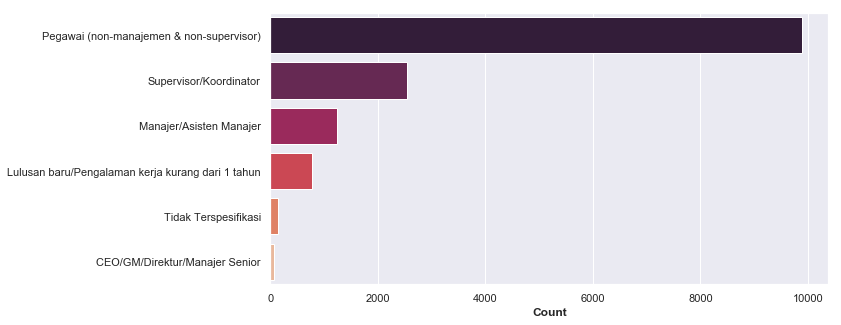

In [51]:
countCL = sns.load_dataset("tips")
sns.set(rc={'figure.figsize':(10, 5)})
barSal = sns.countplot(data = countCL, y = dataset["career_level"], palette="rocket", order = dataset["career_level"].value_counts().index)
plt.xlabel("Count", fontweight='bold')
plt.ylabel("")


plt.show()

Average Salary based on Career Level

In [52]:
dataset.groupby(by="career_level")["salary"].mean().round(0).astype("float").nlargest()

career_level
CEO/GM/Direktur/Manajer Senior              10609571.0
Manajer/Asisten Manajer                      8651532.0
Supervisor/Koordinator                       6487038.0
Tidak Terspesifikasi                         6285822.0
Pegawai (non-manajemen & non-supervisor)     5231279.0
Name: salary, dtype: float64

Kind of Experience Level

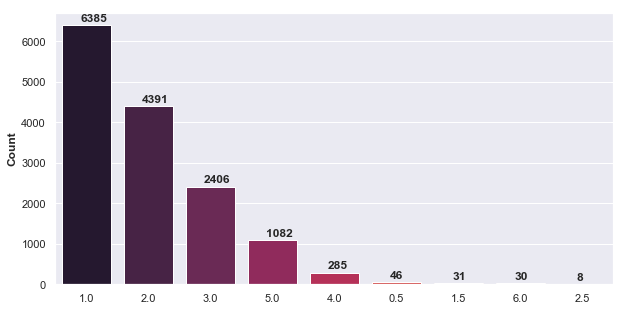

In [53]:
countEXP = sns.load_dataset("tips")
barExp = sns.countplot(data = countCL, x = dataset["experience_level"], palette="rocket", order = dataset["experience_level"].value_counts().index)
plt.ylabel("Count", fontweight='bold')
plt.xlabel("")

for p, label in zip(barExp.patches, dataset["experience_level"].value_counts()):
    barExp.annotate(label, (p.get_x() + 0.3, p.get_height() + 100), fontweight='bold')
    
plt.show()

Average Salary based on Experience Level

In [54]:
dataset.groupby(by="experience_level")["salary"].mean().round(0).nlargest(10) 

experience_level
6.0    8392833.0
5.0    8167824.0
4.0    7042318.0
3.0    6747964.0
2.0    5750195.0
2.5    5228125.0
1.5    5221774.0
1.0    4894261.0
0.5    3832364.0
Name: salary, dtype: float64

**4. Predict the salary**

Predict Salary Based on Experience

In [55]:
xYear = dataset.loc[:, ["experience_level"]].values
ySalary = dataset.loc[:, ["salary"]].values

xTrain, xTest, yTrain, yTest = train_test_split(xYear, ySalary, test_size = 1/3, random_state = 0)
predictExpSal = LinearRegression()
predictExpSal.fit(xTrain, yTrain)

print(xTrain.shape)
print(xTest.shape)

(9776, 1)
(4888, 1)


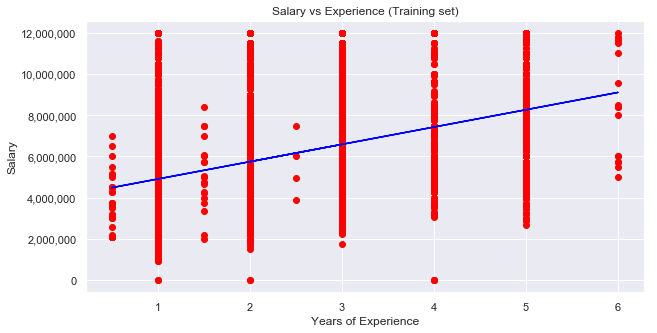

In [56]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, predictExpSal.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

formatSal = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(i) for i in formatSal])

plt.show()

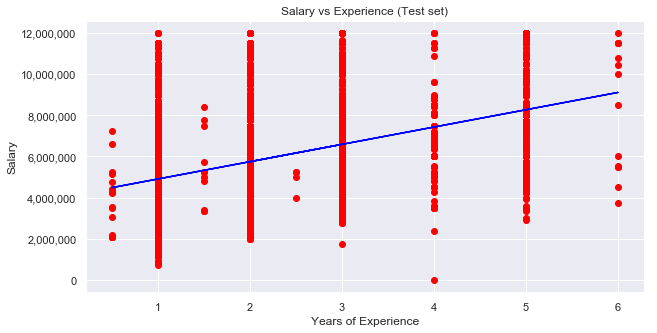

In [57]:
plt.scatter(xTest, yTest, color = 'red')
plt.plot(xTrain, predictExpSal.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.gca().set_yticklabels(['{:,.0f}'.format(i) for i in formatSal])

plt.show()

In [58]:
# Memprediksi gaji dengan experience level
# model.predict(year)
predictExpSal.predict([[20]])

array([[20882951.29916446]])